# Importation:

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, sys

sys.path.append('..')
import fidle.pwk as pwk
import fidle.libfile as libfile
datasets_dir = pwk.init('MNIST1')

<br>**FIDLE 2020 - Practical Work Module**

Version              : 2.0.10
Notebook id          : MNIST1
Run time             : Wednesday 24 February 2021, 13:05:03
TensorFlow version   : 2.2.0
Keras version        : 2.3.0-tf
Datasets dir         : /home/nadourh/Dropbox/PhD_/programming/Initiation_au_Deep_Learning
Run dir              : ./run
Update keras cache   : False


# Step1 Load data:

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
(60000, 28, 28, 1)
(10000, 28, 28, 1)


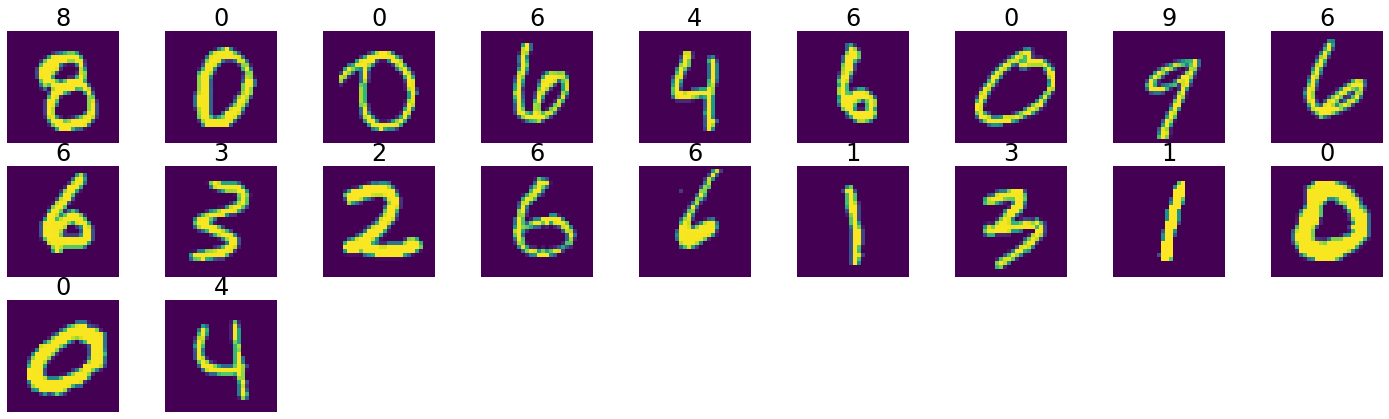

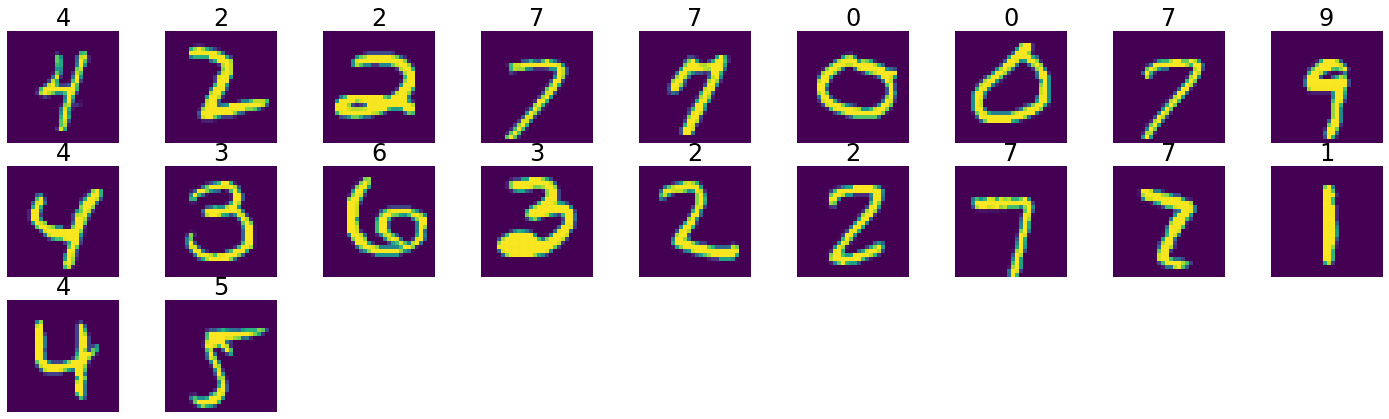

In [21]:
(x_train,y_train),(x_test,y_test) =  keras.datasets.mnist.load_data()
# show hte data:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

print(x_train.shape)
print(x_test.shape)

libfile.plot_images_rand(x_train,y_train,subset_im_numb=20,figsize=(25,7))
libfile.plot_images_rand(x_test,y_test,subset_im_numb=20,figsize=(25,7))

In [3]:
# Normalization
xmax = x_train.max()
print(xmax)
x_train = x_train / xmax
x_test = x_test / xmax
print(x_train.max())

255
1.0


In [23]:
# Build a model :

model = keras.models.Sequential([
    keras.layers.Input((28,28,1)),
    keras.layers.Conv2D(5,(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(10,(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    #keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.summary()


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 5)         50        
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 5)         0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 13, 13, 5)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 11, 11, 10)        460       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 10)          0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 5, 5, 10)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 250)              

In [24]:
# train the model:
history= model.fit(x_train,y_train,verbose=1, batch_size = 512, epochs =20 , validation_data =(x_test,y_test))

Epoch 1/20
118/118 [==============================] - 19s 159ms/step - loss: 7.1990 - accuracy: 0.5096 - val_loss: 0.6749 - val_accuracy: 0.8205
Epoch 2/20
118/118 [==============================] - 19s 163ms/step - loss: 1.2060 - accuracy: 0.7378 - val_loss: 0.3825 - val_accuracy: 0.8811
Epoch 3/20
118/118 [==============================] - 25s 214ms/step - loss: 0.7531 - accuracy: 0.7970 - val_loss: 0.3019 - val_accuracy: 0.9066
Epoch 4/20
118/118 [==============================] - 22s 185ms/step - loss: 0.5756 - accuracy: 0.8317 - val_loss: 0.2443 - val_accuracy: 0.9262
Epoch 5/20
118/118 [==============================] - 21s 174ms/step - loss: 0.4770 - accuracy: 0.8571 - val_loss: 0.2109 - val_accuracy: 0.9385
Epoch 6/20
118/118 [==============================] - 20s 170ms/step - loss: 0.3952 - accuracy: 0.8784 - val_loss: 0.1850 - val_accuracy: 0.9456
Epoch 7/20
118/118 [==============================] - 19s 165ms/step - loss: 0.3561 - accuracy: 0.8904 - val_loss: 0.1677 - val_ac

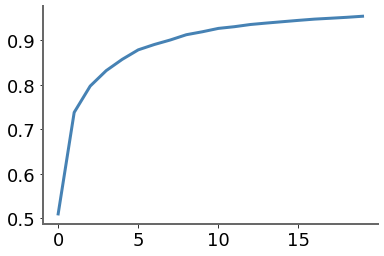

In [26]:
# evaluate:
plt.plot(np.array(history.history['accuracy']))
#plt.plot(np.array(history.history['loss']))

#plt.plot(np.array(pd.DataFrame(history.history)))

#print(history.history)
#pwk.plot_history(history)

In [27]:
# evaluate:
score =  model.evaluate(x_test,y_test)
print('loss, accuracy = ' ,score)

313/313 [==============================] - 1s 4ms/step - loss: 0.0708 - accuracy: 0.9766
loss, accuracy =  [0.07083284109830856, 0.9765999913215637]


../fidle/libfile.py:50: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if pred != 'None' and pred[img_index] != labels[img_index]:


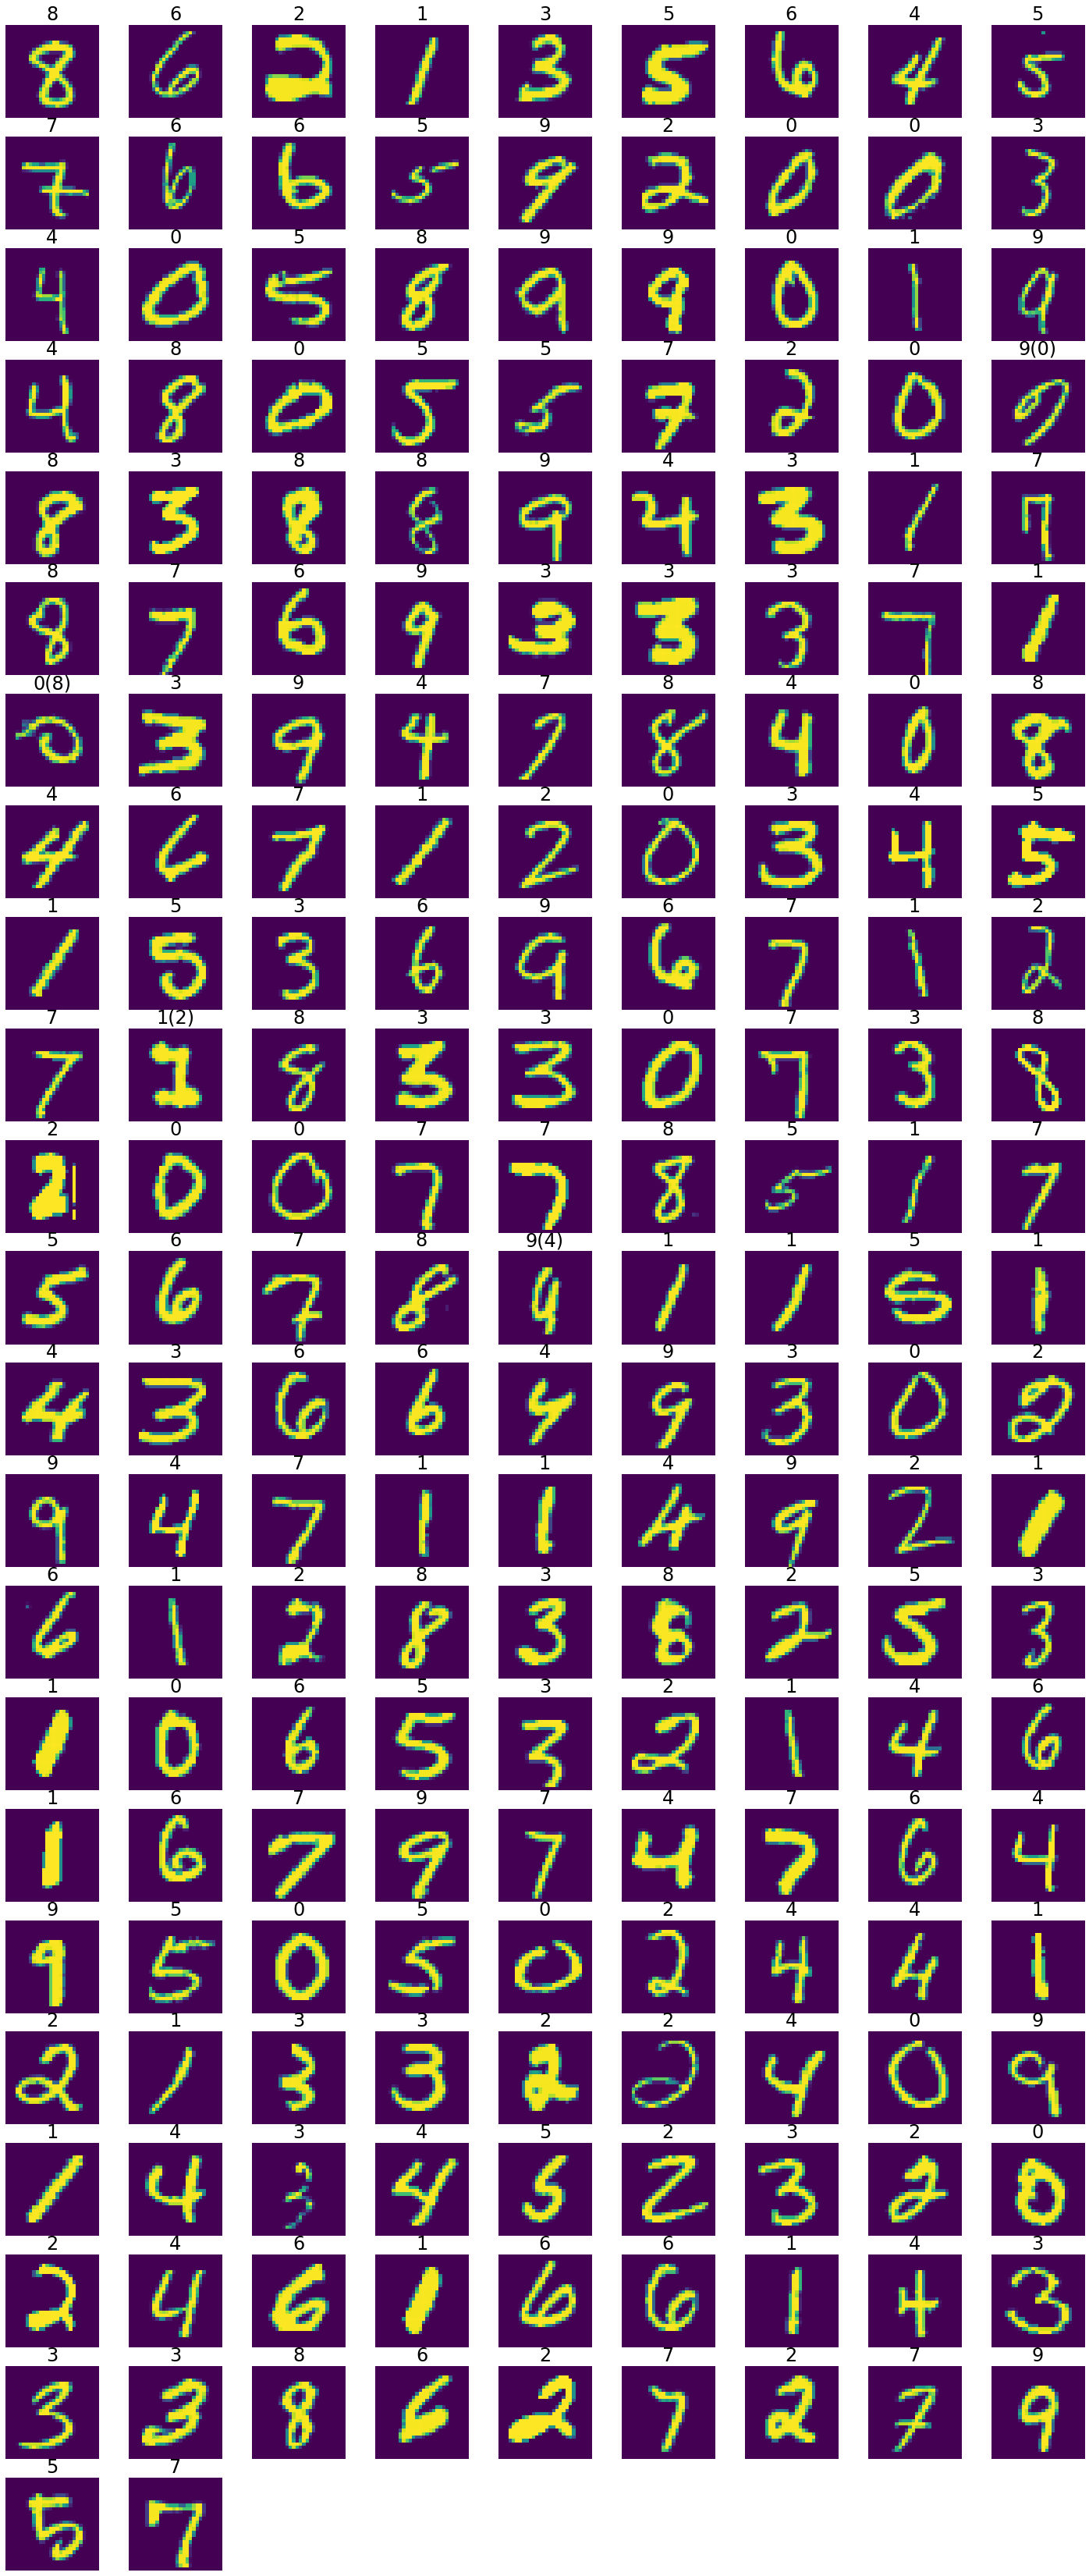

In [30]:
y_sigmoid = model.predict(x_test)
y_pred  = np.argmax(y_sigmoid, axis=-1)
libfile.plot_images_rand(x_test,y_test,subset_im_numb=200,figsize=(25,60),pred=y_pred)